# Challenge: Descriptive Statistics
## 1: Introduction
In this challenge, you'll practice the statistical techniques you learned in the previous missions. These techniques are referred to collectively as **descriptive statistics** since they're used to describe and understand a dataset and not directly for prediction.

The FiveThirtyEight team recently released a dataset containing the critics scores for a sample of movies that have substantive (at least 30) user and critic reviews from IMDB, Rotten Tomatoes, Metacritic, IMDB, and Fandango. Whenever a movie is released, movie review sites ask their approved network of critics and their site's user base to rate the movie. These scores are aggregated and the average score from both groups are posted on their site for each movie.

Here are links to the page for **Star Trek Beyond** for each site:

- [Rotten Tomatoes](https://www.rottentomatoes.com/m/star_trek_beyond)
- [Fandango](http://www.fandango.com/startrekbeyond_188462/movieoverview)
- [Metacritic](http://www.metacritic.com/movie/star-trek-beyond)
- [IMDB](http://www.imdb.com/title/tt2660888/)

The dataset contains information on most movies from 2014 and 2015 and was used to help the team at FiveThirtyEight explore Fandango's suspiciously high ratings. You can read their analysis [here](http://fivethirtyeight.com/features/fandango-movies-ratings/).

You'll be working with the file *fandango_score_comparison.csv*, which you can download from their [Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Here are some of the columns in the dataset:

- *FILM* - film name.
- *RottenTomatoes* - Rotten Tomatoes critics average score.
- *RottenTomatoes_User* - Rotten Tomatoes user average score.
- *RT_norm* - Rotten Tomatoes critics average score (normalized to a 0 to 5 point scale).
- *RT_user_norm* - Rotten Tomatoes user average score (normalized to a 0 to 5 point scale).
- *Metacritic* - Metacritic critics average score.
- *Metacritic_user_nom* - Metacritic user average score (normalized to a 0 to 5 point scale).
- *Metacritic_norm* - Metacritic critics average score (normalized to a 0 to 5 point scale).
- *Fandango_Ratingvalue* - Fandango user average score (0 to 5 stars).
- *IMDB_norm* - IMDB user average score (normalized to a 0 to 5 point scale).

The full column list and descriptions are available at [FiveThirtyEight's Github repo](https://github.com/fivethirtyeight/data/tree/master/fandango). Let's focus on the normalized user scores for now and generate histograms to better understand each site's distributions.

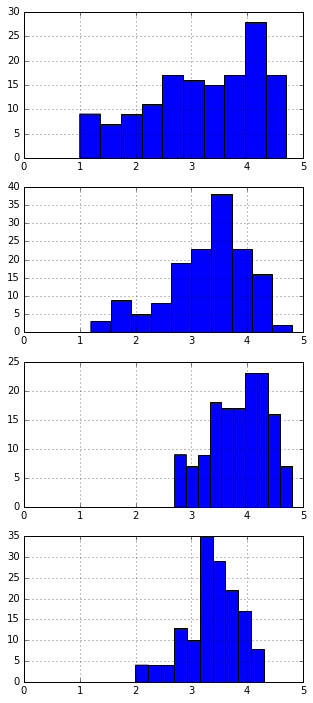

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
movie_reviews = pd.read_csv("D:\YandexDisk\ML\Dataquest\\fandango_score_comparison.csv")

fig = plt.figure(figsize=(5,12))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)
ax4.set_xlim(0,5.0)

movie_reviews["RT_user_norm"].hist(ax=ax1)
movie_reviews["Metacritic_user_nom"].hist(ax=ax2)
movie_reviews["Fandango_Ratingvalue"].hist(ax=ax3)
movie_reviews["IMDB_norm"].hist(ax=ax4)

## 2: Mean
The most obvious things that stick out is that essentially all of the Fandango average user reviews are greater than 3 on a 5 point scale. The distributions of the Rotten Tomatoes and Metacritic scores, on the other hand, more closely resemble a normal distribution, which is generally what you'd expect if you knew nothing else. This is because the normal distribution is the most common distribution in nature and is used to approximate many phenomenon. Starting with the assumption that a phemonenon is normal is incredibly common, especially when you don't have a clear generative model to understand how the data was generated.

Now that you hopefully have some visual understanding of these scores, let's calculate some statistical measures to see how the properties the histograms suggested are reflected in numerical values. Let's focus on just the normalized user reviews in this mission.

In [32]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean    

columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_means = user_reviews.apply(calc_mean)

rt_mean = user_reviews_means["RT_user_norm"]
mc_mean = user_reviews_means["Metacritic_user_nom"]
fg_mean = user_reviews_means["Fandango_Ratingvalue"]
id_mean = user_reviews_means["IMDB_norm"]

print("Rotten Tomatoes (mean):", rt_mean)
print("Metacritic (mean):", mc_mean)
print("Fandango (mean):",fg_mean)
print("IMDB (mean):",id_mean)

Rotten Tomatoes (mean): 3.19383561644
Metacritic (mean): 3.2595890411
Fandango (mean): 3.84520547945
IMDB (mean): 3.36849315068


## 3: Variance And Standard Deviation
It seems like the Fandango user reviews have the highest mean and skew the most towards to the higher end compared to the other review sites. Let's now calculate variance and standard deviation to better understand the spreads.

In [33]:
def calc_variance(column):
    mean = column.mean()
    variance = 0
    for p in column:
        difference = p - mean
        square_difference = difference ** 2
        variance += square_difference
    variance = variance / len(column)
    return variance

columns = ["RT_user_norm", "Metacritic_user_nom", "Fandango_Ratingvalue", "IMDB_norm"]
user_reviews = movie_reviews[columns]
user_reviews_var = user_reviews.apply(calc_variance)
user_reviews_stdev = user_reviews.apply(calc_variance) ** (1/2)


rt_var = user_reviews_var["RT_user_norm"]
mc_var = user_reviews_var["Metacritic_user_nom"]
fg_var = user_reviews_var["Fandango_Ratingvalue"]
id_var = user_reviews_var["IMDB_norm"]

rt_stdev = user_reviews_stdev["RT_user_norm"]
mc_stdev = user_reviews_stdev["Metacritic_user_nom"]
fg_stdev = user_reviews_stdev["Fandango_Ratingvalue"]
id_stdev = user_reviews_stdev["IMDB_norm"]

print("Rotten Tomatoes (variance):", rt_var)
print("Metacritic (variance):", mc_var)
print("Fandango (variance):",fg_var)
print("IMDB (variance):",id_var)
print("Rotten Tomatoes (standard deviation):", rt_stdev)
print("Metacritic (standard deviation):", mc_stdev)
print("Fandango (standard deviation):",fg_stdev)
print("IMDB (standard deviation):",id_stdev)

Rotten Tomatoes (variance): 0.995578438731
Metacritic (variance): 0.566654625633
Fandango (variance): 0.251107149559
IMDB (variance): 0.228219647213
Rotten Tomatoes (standard deviation): 0.997786770173
Metacritic (standard deviation): 0.752764654878
Fandango (standard deviation): 0.501105926486
IMDB (standard deviation): 0.47772340032


## 4: Scatter Plots
The mean and variance values you calculated in the last screens should match the visual intuition the histograms gave you. Rotten Tomatoes and Metacritic have more spread out scores (high variance) and the mean is around 3. Fandango, on the other hand, has low spread (low variance) and a much higher mean, which could imply that the site has a strong bias towards higher reviews. IMDB is somewhere in the middle, with a low variance, like Fandango's user reviews, but a much more moderate mean value.

So it seems like something is especially fishy about Fandango's ratings, which was the inspiration behind the [FiveThirtyEight post](http://fivethirtyeight.com/features/fandango-movies-ratings) to begin with. Since Fandango's main business is selling movie tickets, it's possible their primary incentive may differ from pure review sites like Rotten Tomatoes or Metacritic.

Let's now explore if Fandango's user ratings are at least relatively correct. More precisely, are movies that are highly rated on Rotten Tomatoes, IMDB, and Metacritic also highly rated on Fandango?

We can accomplish that by understanding how Fandango's scores and related to scores from Rotten Tomatoes and Metacritic. First things first, let's get a visual sense by generating scatter plots.

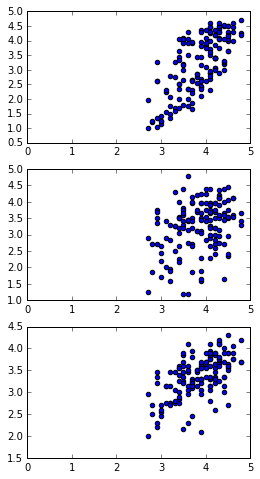

In [34]:
fig = plt.figure(figsize=(4,8))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.set_xlim(0,5.0)
ax2.set_xlim(0,5.0)
ax3.set_xlim(0,5.0)

RT = movie_reviews["RT_user_norm"]
MT = movie_reviews["Metacritic_user_nom"]
FN = movie_reviews["Fandango_Ratingvalue"]
DB = movie_reviews["IMDB_norm"]

ax1.scatter(FN, RT)
ax2.scatter(FN, MT)
ax3.scatter(FN, DB)

## 5: Covariance
It seems like Rotten Tomatoes and IMDB user reviews correlate the most with Fandango user reviews while Metacritic only weakly correlates. Let's write a function that to calculates the covariance values in this screen and a function to calculate the correlation values in the next screen.

In [35]:
def calc_covariance(column1, column2):
    mean1 = sum(column1.values) / len(column1.values)
    mean2 = sum(column2.values) / len(column2.values)
    covariance = (sum((column1 - mean1) * (column2 - mean2))) / len(column1)
    return covariance

rt_fg_covar = calc_covariance(RT, FN)
mc_fg_covar = calc_covariance(MT, FN)
id_fg_covar = calc_covariance(DB, FN)

print("The covariance between Rotten Tomatoes and Fandago:", rt_fg_covar)
print("The covariance between Metacritic and Fandago:", mc_fg_covar)
print("The covariance between IMDB and Fandago:",id_fg_covar)

The covariance between Rotten Tomatoes and Fandago: 0.362162225558
The covariance between Metacritic and Fandago: 0.127100769375
The covariance between IMDB and Fandago: 0.143718802777


## 6: Correlation
Interestingly, Rotten Tomatoes covaries strongly with Fandango (0.36) compared to Metacritic (0.13) and IMDB (0.14). Finally, let's calculate the correlation values by using the calc_covariance a function from the previous step.

In [36]:
def calc_mean(series):
    vals = series.values
    mean = sum(vals) / len(vals)
    return mean

def calc_variance(series):
    mean = calc_mean(series)
    squared_deviations = (series - mean)**2
    mean_squared_deviations = calc_mean(squared_deviations)
    return mean_squared_deviations

def calc_covariance(series_one, series_two):
    x = series_one.values
    y = series_two.values
    x_mean = calc_mean(series_one)
    y_mean = calc_mean(series_two)
    x_diffs = [i - x_mean for i in x]
    y_diffs = [i - y_mean for i in y]
    codeviates = [x_diffs[i] * y_diffs[i] for i in range(len(x))]
    return sum(codeviates) / len(codeviates)

def calc_correlation(series1, series2):
    cov = calc_covariance(series1, series2)
    var1 = calc_variance(series1) ** (1/2)
    var2 = calc_variance(series2) ** (1/2)
    corr = cov / (var1*var2)
    return corr

rt_fg_corr = calc_correlation(RT, FN)
mc_fg_corr = calc_correlation(MT, FN)
id_fg_corr = calc_correlation(DB, FN)

print("The correlation between Rotten Tomatoes and Fandago:", rt_fg_corr)
print("The correlation between Metacritic and Fandago:", mc_fg_corr)
print("The correlation between IMDB and Fandago:",id_fg_corr)

The correlation between Rotten Tomatoes and Fandago: 0.724328994249
The correlation between Metacritic and Fandago: 0.336945314265
The correlation between IMDB and Fandago: 0.600354177263


As the scatter plots suggested, Rotten Tomatoes and IMDB correlate the strongest with Fandango, with correlation values of 0.72 and 0.60 respectively. Metacritic, on the other hand, only has a correlation value of 0.34 with Fandango. While covariance and correlation values may seem complicated to compute and hard to reason with, their best use case is in comparing relationships like we did in this challenge.